# Experiments

In this notebook, we perform experiments on proposed method of  `MULTI OBJECTIVE COMBINATORIAL OPTIMIZATIONIN SCHEDULING APPLICATIONS` based on genetic algorithm.

# Import Required Libraries

In [3]:
import itertools

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# from __future__ import annotations
import warnings
warnings.filterwarnings('ignore')

# proposed genetic algorithm for scheduling
from algorithm.components import *

## Experiment Settings

In [4]:
n_machines, n_jobs = 20, 80

#n_machines, n_jobs = 30, 150

#n_machines, n_jobs = 20, 100

#n_machines, n_jobs = 40, 104

# ------------parameters setting --------------
np.random.seed(2021)
# setup time required between jobs 
beta = np.random.uniform(10.0, 50.0, size=(n_jobs, n_jobs))
# shade value
s = np.random.uniform(10.0, 50.0, size=n_jobs)
# shade difference    
s_diff = np.abs(s - s.reshape(-1,1))

# compute strength between each pair
cost_ = stats.hmean(np.array([beta,s_diff]))
lambda_ = np.reciprocal(cost_, out=np.zeros(cost_.shape), where=cost_!=0)

#
parameters = {'beta':beta, 's': s, 's_diff':s_diff, 'lambda_':lambda_}

## Create object of different components of algorithm

In [5]:
pop = Population(n_machines, n_jobs, **parameters)
fitness = Fitness(n_machines, n_jobs, **parameters)
sel = Selection(n_machines, n_jobs, **parameters)
co = CrossOver(n_machines, n_jobs, **parameters)
mut = Mutation(n_machines, n_jobs, **parameters)

## Run Proposed Algorithm

In [6]:
NUM_GENERATION = 100
PROB_MUT = 0.1
SIZE = 100

init_population = pop.generate(SIZE)
pool = init_population
fitness.assignment(pool)

best_schedule = []
for gen in range(NUM_GENERATION):   

    # apply operators
    new_pool = sel.apply(pool)
    
    h = sorted(new_pool, key=lambda x: x.score)
    best_schedule.append([h[0],h[1],h[2]])
    print(gen, h[0].score, h[0].fitness)
    
    offspring_pool2 = co.apply(new_pool)
    
    offspring_pool = []
    for mh in offspring_pool2:
        if mh.M.sum() == n_jobs:
            offspring_pool.append(mh)
    offspring_pool = offspring_pool2
    
    
    mut_pool = mut.apply(offspring_pool, PROB_MUT)
    
    # suvivor selection
    pool = list(itertools.chain(new_pool,offspring_pool,mut_pool))
    fitness.assignment(pool)
    pool = sel.survivor_selection(pool, SIZE)

0 2297.5925801920034 0.0031662547760833984
1 2253.907392802931 0.0016664838316890974
2 2116.1821996635113 0.0013621745984453012
3 2032.2618692297992 0.0013554401404542126
4 2193.2010952930464 0.001552908255684018
5 2187.1067125284603 0.0015783362240110166
6 2017.8763099215748 0.0018356812499212992
7 2061.650902059527 0.0007259013971703076
8 2055.600588330363 0.0009789805848440401
9 2149.949615506345 0.0015834630626480539
10 2206.3869212064324 0.0017992341091425412
11 2148.8705128536058 0.0005641939426847541
12 2346.29229896353 0.0015996220222369816
13 2069.4780346804196 0.0017050768462589304
14 2011.010703172841 0.000787290639171728
15 2060.3031612152677 0.0011180361564192213
16 2016.6276595268191 0.0014525282827096283
17 2103.8338544136172 0.0014458682823580132
18 2205.724558924645 0.0011731415276783881
19 2129.2052609417583 0.0010449119866033092
20 2164.662308719246 0.001670398571984694
21 2152.3506358502427 0.0013589891467129787
22 2153.021108598378 0.0011526755971819934
23 2063.749

### Convert to Dataframes

In [14]:
data = pd.DataFrame([[gen,s[1].score, s[1].fitness] for gen, s in enumerate(best_schedule)], 
             columns=['Generation', 'score', 'Best Score'])
data2 = pd.DataFrame([[gen,s[0].score, s[0].fitness] for gen, s in enumerate(best_schedule)], 
             columns=['Generation', 'score', 'Best Score'])

### Plot resultant data

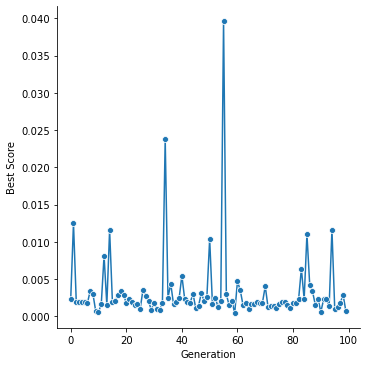

In [15]:

sns.relplot(data=data, kind="line", x="Generation", y="Best Score", marker="o")

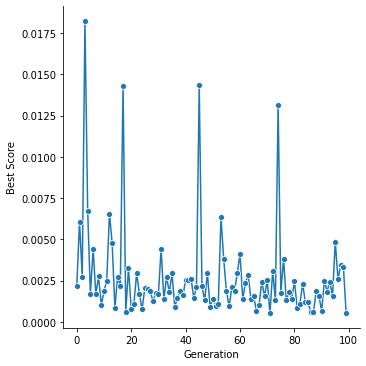

In [28]:
data2 = pd.DataFrame([[gen,s[2].score, s[2].fitness] for gen, s in enumerate(best_schedule)], 
             columns=['Generation', 'score', 'Best Score'])

sns.relplot(data=data2, kind="line", x="Generation", y="Best Score", marker="o")

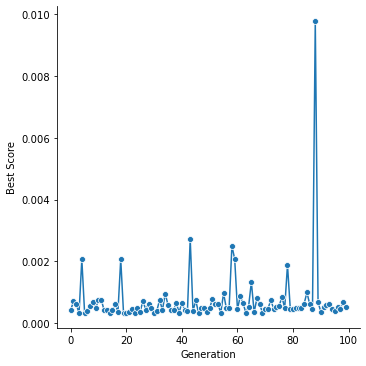

In [16]:
data2 = pd.DataFrame([[gen,s.score, s.fitness] for gen, s in enumerate(pool)], 
             columns=['Generation', 'score', 'Best Score'])

sns.relplot(data=data2, kind="line", x="Generation", y="Best Score", marker="o")

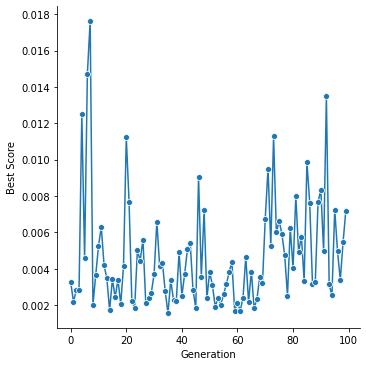

In [17]:
data2 = pd.DataFrame([[gen,s.score, s.fitness] for gen, s in enumerate(init_population)], 
             columns=['Generation', 'score', 'Best Score'])

sns.relplot(data=data2, kind="line", x="Generation", y="Best Score", marker="o")

In [19]:
for i in sorted(pool, key=lambda x: x.fitness, reverse=True):
    print(i.fitness)

0.009779116508255485
0.0027271127125996445
0.002503576807186746
0.002082726295155622
0.0020735258003727643
0.0020735258003727643
0.0018890910665852658
0.0013414833072112535
0.0009988946179455283
0.000972720921494913
0.0009641066630365785
0.0008717078280135602
0.0008635862415060045
0.0008051746309188808
0.0007859055109775719
0.0007689488167460089
0.0007689488167460089
0.0007689488167460089
0.0007537477360620125
0.0007392863203279549
0.0007359385561924051
0.0007061123573949443
0.0006964809052703943
0.0006823547836172087
0.0006823547836172087
0.0006718448831386571
0.000662767203169613
0.0006582815328659069
0.0006406618753008799
0.0006362356089643205
0.0006201819433438978
0.0006190796936520143
0.0006190796936520143
0.0006190796936520143
0.0006190796936520143
0.0006190796936520143
0.0006190796936520143
0.0005981175851302723
0.0005946924063819757
0.0005692998037164567
0.000553039619322498
0.0005333354984402279
0.0005289474384632834
0.0005254673105686352
0.0005212665278136961
0.00051791682643